<a href="https://colab.research.google.com/github/adarshnitt/House-Prediction/blob/main/HousePrediction_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
# inserting google drive under content directory
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# Installing kaggle 
! pip install Kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"adarshnitt","key":"c969fd94d77a9fd17f54ba0f85c90747"}'}

In [4]:
# making folder to store our data
! mkdir  ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
# copy path of imported file kaggle.json to our newly forlder
! cp kaggle.json  ~/.kaggle/

In [6]:
! ~/.kaggle

/bin/bash: /root/.kaggle: Is a directory


In [7]:
# trial
! mkdir ~/adarsh

mkdir: cannot create directory ‘/root/adarsh’: File exists


In [8]:
# altering permission of /.kaggle
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
# mounting any competionn data by visiting cometion and copy data api under data column in competition
# i am using data api of competiton " 30 day of ml"
#! api
! kaggle competitions download -c home-data-for-ml-course
 # successfully adat is available under /content

train.csv.gz: Skipping, found more recently modified local copy (use --force to force download)
test.csv.gz: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.gz: Skipping, found more recently modified local copy (use --force to force download)
data_description.txt: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)


In [60]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# import train data from kaggle
train=pd.read_csv(r"/content/train.csv")

In [12]:
# importing test data
test=pd.read_csv(r"/content/test.csv")

In [13]:
train.describe()

Id   MSSubClass  ...       YrSold      SalePrice
count  1460.000000  1460.000000  ...  1460.000000    1460.000000
mean    730.500000    56.897260  ...  2007.815753  180921.195890
std     421.610009    42.300571  ...     1.328095   79442.502883
min       1.000000    20.000000  ...  2006.000000   34900.000000
25%     365.750000    20.000000  ...  2007.000000  129975.000000
50%     730.500000    50.000000  ...  2008.000000  163000.000000
75%    1095.250000    70.000000  ...  2009.000000  214000.000000
max    1460.000000   190.000000  ...  2010.000000  755000.000000

[8 rows x 38 columns]

In [14]:
y=train["SalePrice"]
x=train.drop(["SalePrice"],axis=1)

In [102]:
cat_col=x.select_dtypes(include=["object"])
num_col=x.select_dtypes(exclude=["object"])

In [16]:
cat_col.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

**Data preprocessing: Imputation and encoding**

In [17]:
y.isnull().sum() # checking null values in y table

0

In [18]:
# select only those features which are participating more than threshold correlation participation.
def pairplot1(num_col):
  corr=num_col.corr()
  corr_ncol=corr.columns
  pass

In [19]:
num_col

Id  MSSubClass  LotFrontage  LotArea  ...  PoolArea  MiscVal  MoSold  YrSold
0        1          60         65.0     8450  ...         0        0       2    2008
1        2          20         80.0     9600  ...         0        0       5    2007
2        3          60         68.0    11250  ...         0        0       9    2008
3        4          70         60.0     9550  ...         0        0       2    2006
4        5          60         84.0    14260  ...         0        0      12    2008
...    ...         ...          ...      ...  ...       ...      ...     ...     ...
1455  1456          60         62.0     7917  ...         0        0       8    2007
1456  1457          20         85.0    13175  ...         0        0       2    2010
1457  1458          70         66.0     9042  ...         0     2500       5    2010
1458  1459          20         68.0     9717  ...         0        0       4    2010
1459  1460          20         75.0     9937  ...         0        0       6    2008

[1460 rows x 37 columns]

In [20]:
null_track=num_col.isnull().sum()>0

In [21]:
num_col_nnull=num_col.columns[null_track]

In [22]:
ncorr=num_col[num_col_nnull].corr()
ncorr

LotFrontage  MasVnrArea  GarageYrBlt
LotFrontage     1.000000    0.193458     0.070250
MasVnrArea      0.193458    1.000000     0.252691
GarageYrBlt     0.070250    0.252691     1.000000

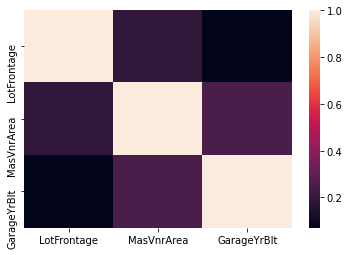

In [23]:
import seaborn as sns
%matplotlib inline
sns.heatmap(ncorr)  # only for numerical data which are not null

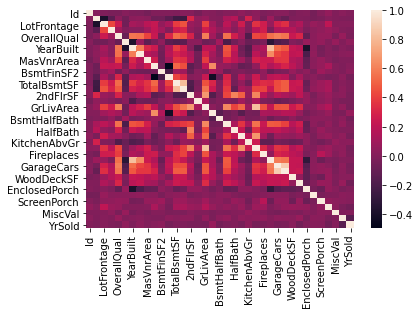

In [24]:
corr2=num_col.corr()
sns.heatmap(corr2)   # heat map for all numrical data including null too

In [25]:
corr2

Id  MSSubClass  LotFrontage  ...   MiscVal    MoSold    YrSold
Id             1.000000    0.011156    -0.010601  ... -0.006242  0.021172  0.000712
MSSubClass     0.011156    1.000000    -0.386347  ... -0.007683 -0.013585 -0.021407
LotFrontage   -0.010601   -0.386347     1.000000  ...  0.003368  0.011200  0.007450
LotArea       -0.033226   -0.139781     0.426095  ...  0.038068  0.001205 -0.014261
OverallQual   -0.028365    0.032628     0.251646  ... -0.031406  0.070815 -0.027347
OverallCond    0.012609   -0.059316    -0.059213  ...  0.068777 -0.003511  0.043950
YearBuilt     -0.012713    0.027850     0.123349  ... -0.034383  0.012398 -0.013618
YearRemodAdd  -0.021998    0.040581     0.088866  ... -0.010286  0.021490  0.035743
MasVnrArea    -0.050298    0.022936     0.193458  ... -0.029815 -0.005965 -0.008201
BsmtFinSF1    -0.005024   -0.069836     0.233633  ...  0.003571 -0.015727  0.014359
BsmtFinSF2    -0.005968   -0.065649     0.049900  ...  0.004940 -0.015211  0.031706
BsmtUnfSF     -0.007940   -0.140759     0.132644  ... -0.023837  0.034888 -0.041258
TotalBsmtSF   -0.015415   -0.238518     0.392075  ... -0.018479  0.013196 -0.014969
1stFlrSF       0.010496   -0.251758     0.457181  ... -0.021096  0.031372 -0.013604
2ndFlrSF       0.005590    0.307886     0.080177  ...  0.016197  0.035164 -0.028700
LowQualFinSF  -0.044230    0.046474     0.038469  ... -0.003793 -0.022174 -0.028921
GrLivArea      0.008273    0.074853     0.402797  ... -0.002416  0.050240 -0.036526
BsmtFullBath   0.002289    0.003491     0.100949  ... -0.023047 -0.025361  0.067049
BsmtHalfBath  -0.020155   -0.002333    -0.007234  ... -0.007367  0.032873 -0.046524
FullBath       0.005587    0.131608     0.198769  ... -0.014290  0.055872 -0.019669
HalfBath       0.006784    0.177354     0.053532  ...  0.001290 -0.009050 -0.010269
BedroomAbvGr   0.037719   -0.023438     0.263170  ...  0.007767  0.046544 -0.036014
KitchenAbvGr   0.002951    0.281721    -0.006069  ...  0.062341  0.026589  0.031687
TotRmsAbvGrd   0.027239    0.040380     0.352096  ...  0.024763  0.036907 -0.034516
Fireplaces    -0.019772   -0.045569     0.266639  ...  0.001409  0.046357 -0.024096
GarageYrBlt    0.000072    0.085072     0.070250  ... -0.032417  0.005337 -0.001014
GarageCars     0.016570   -0.040110     0.285691  ... -0.043080  0.040522 -0.039117
GarageArea     0.017634   -0.098672     0.344997  ... -0.027400  0.027974 -0.027378
WoodDeckSF    -0.029643   -0.012579     0.088521  ... -0.009551  0.021011  0.022270
OpenPorchSF   -0.000477   -0.006100     0.151972  ... -0.018584  0.071255 -0.057619
EnclosedPorch  0.002889   -0.012037     0.010700  ...  0.018361 -0.028887 -0.009916
3SsnPorch     -0.046635   -0.043825     0.070029  ...  0.000354  0.029474  0.018645
ScreenPorch    0.001330   -0.026030     0.041383  ...  0.031946  0.023217  0.010694
PoolArea       0.057044    0.008283     0.206167  ...  0.029669 -0.033737 -0.059689
MiscVal       -0.006242   -0.007683     0.003368  ...  1.000000 -0.006495  0.004906
MoSold         0.021172   -0.013585     0.011200  ... -0.006495  1.000000 -0.145721
YrSold         0.000712   -0.021407     0.007450  ...  0.004906 -0.145721  1.000000

[37 rows x 37 columns]

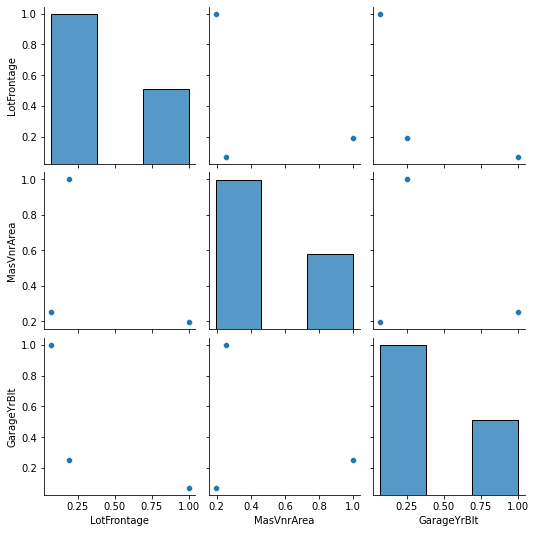

In [26]:
sns.pairplot(ncorr) # pqairplot for not null numerical data

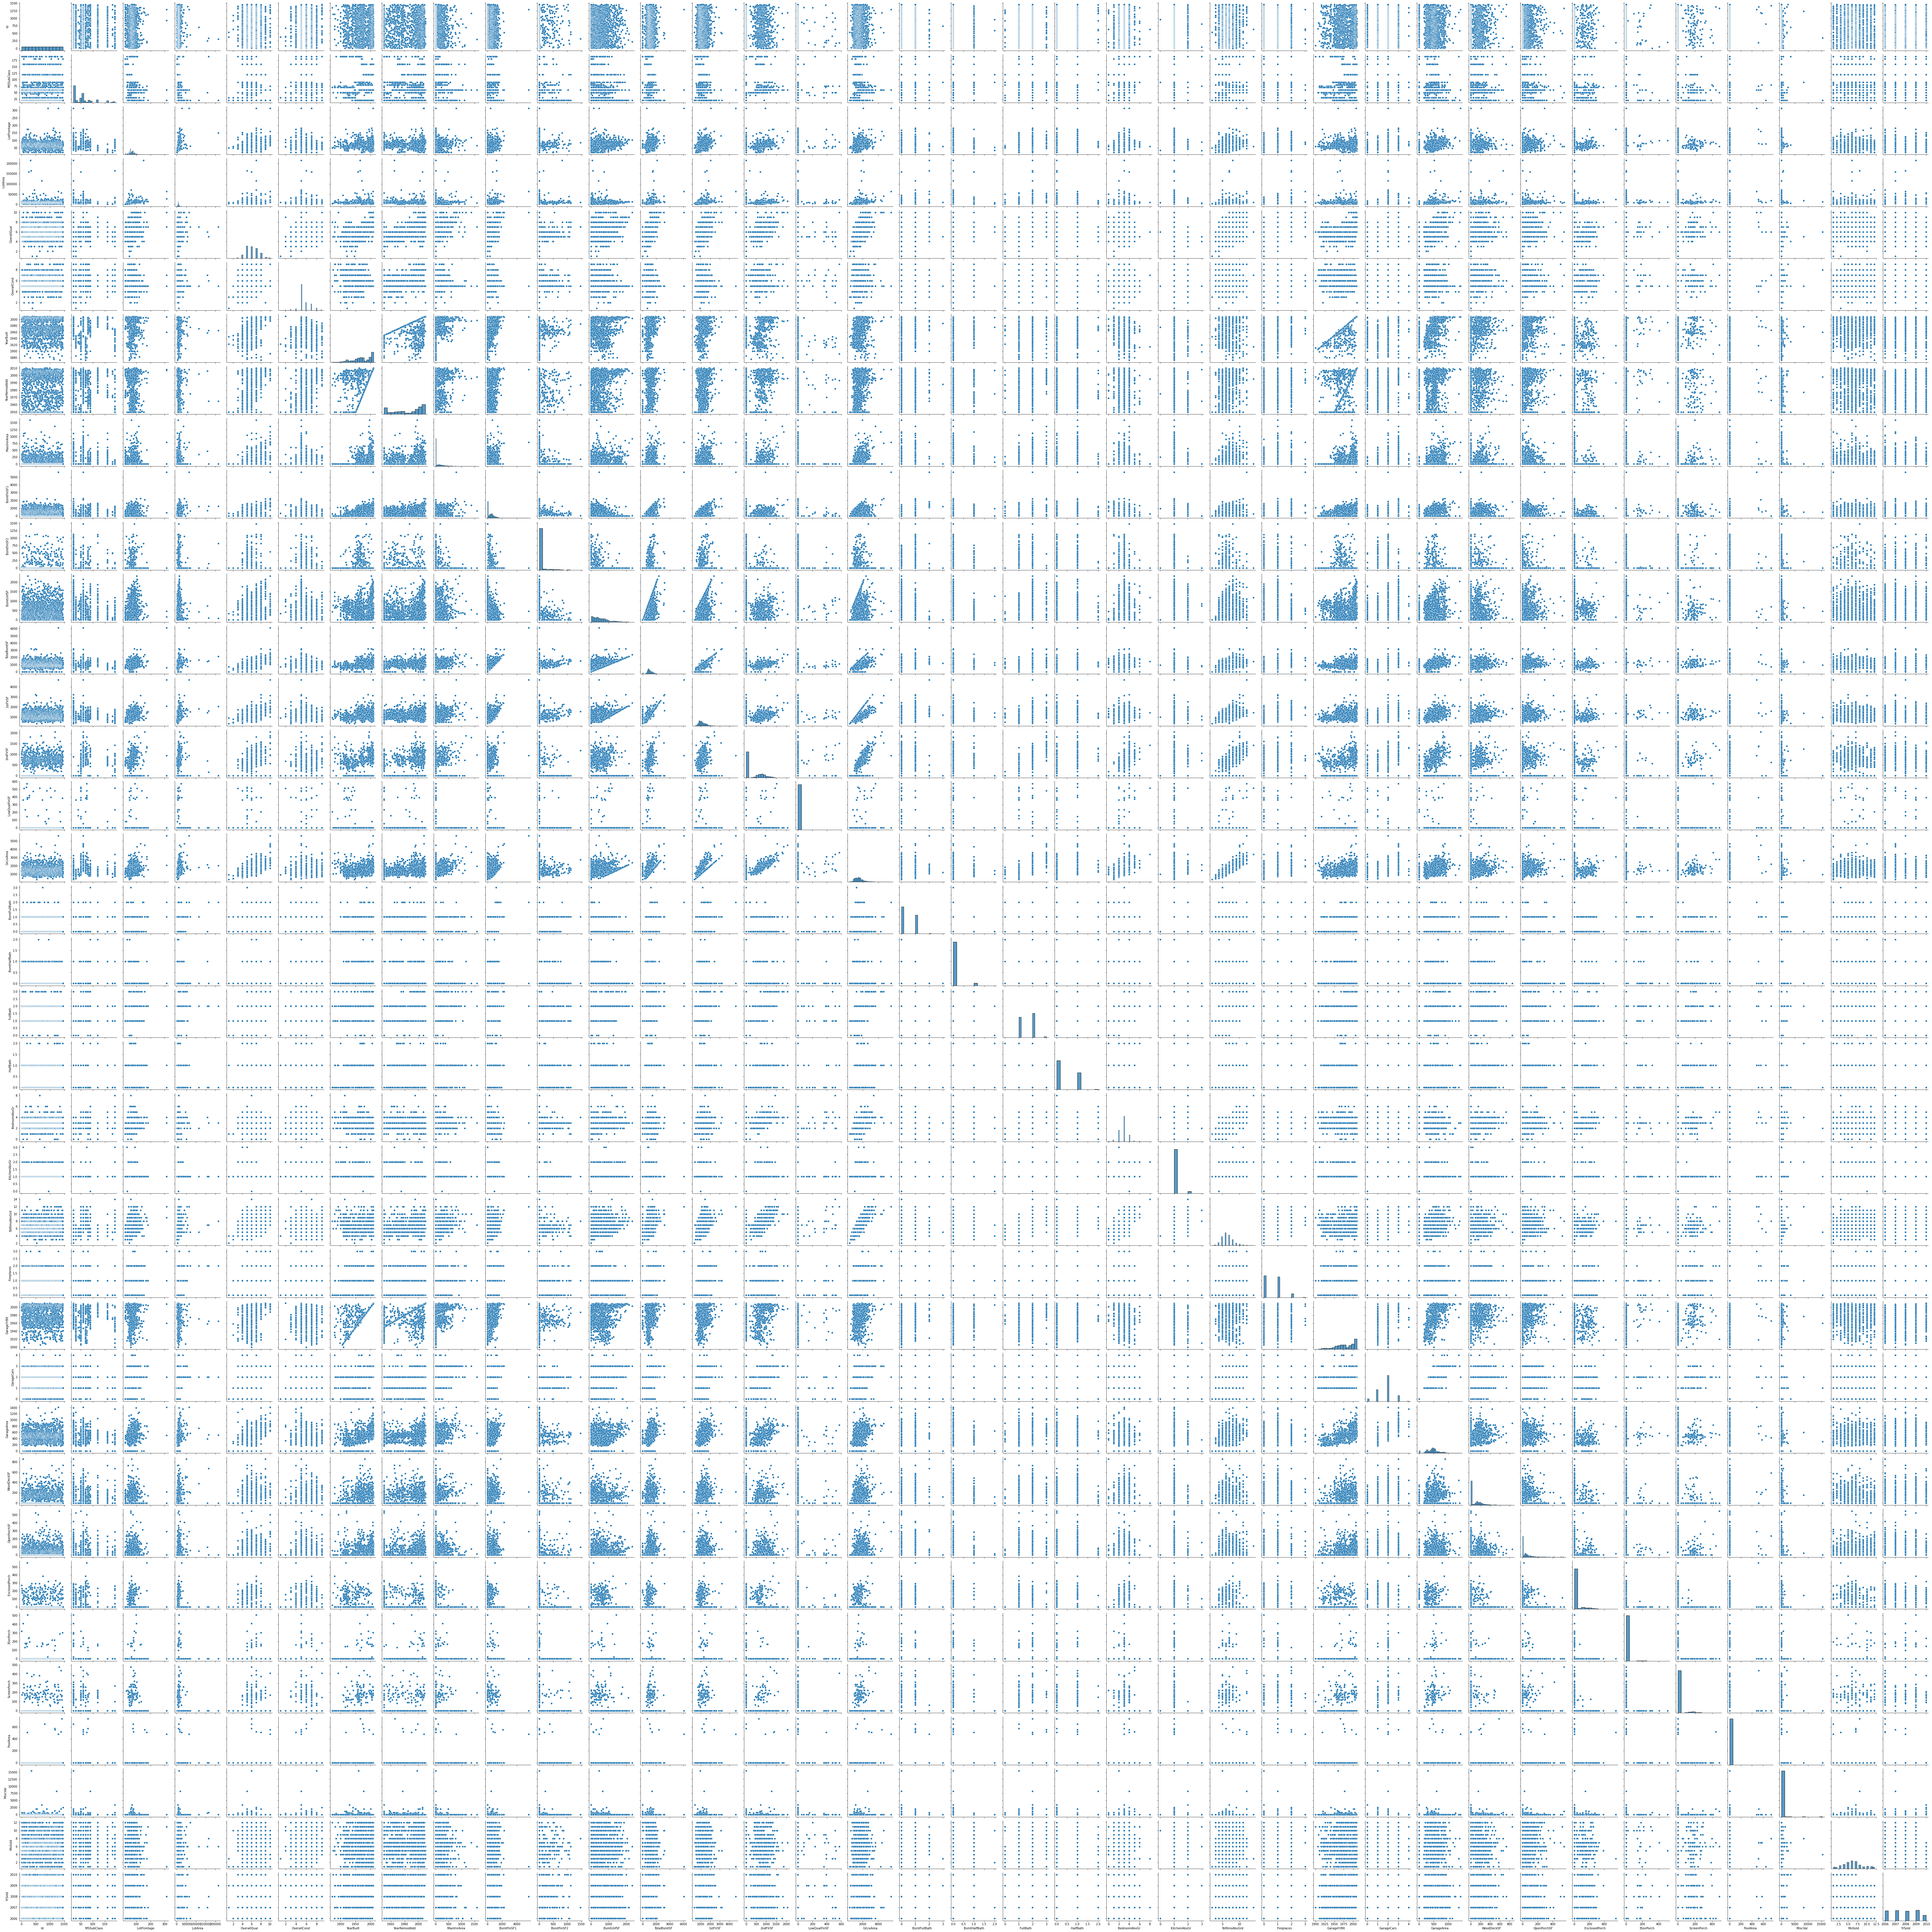

In [27]:
sns.pairplot(x)

In [ ]:
sns.pairplot(num_col)

In [29]:
num_col

Id  MSSubClass  LotFrontage  LotArea  ...  PoolArea  MiscVal  MoSold  YrSold
0        1          60         65.0     8450  ...         0        0       2    2008
1        2          20         80.0     9600  ...         0        0       5    2007
2        3          60         68.0    11250  ...         0        0       9    2008
3        4          70         60.0     9550  ...         0        0       2    2006
4        5          60         84.0    14260  ...         0        0      12    2008
...    ...         ...          ...      ...  ...       ...      ...     ...     ...
1455  1456          60         62.0     7917  ...         0        0       8    2007
1456  1457          20         85.0    13175  ...         0        0       2    2010
1457  1458          70         66.0     9042  ...         0     2500       5    2010
1458  1459          20         68.0     9717  ...         0        0       4    2010
1459  1460          20         75.0     9937  ...         0        0       6    2008

[1460 rows x 37 columns]

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [47]:
cat_col=list(x.select_dtypes(include=["object"]).columns)
num_col=list(x.select_dtypes(exclude=["object"]).columns)

<h2>Pipeline Construction </h2>

In [48]:
# Data preprocessing Steps is doin
#1- Doing  Categorical data to Imputation(mode) then Encoding(OneHot Encoder) then Normalization(preprocessing.Normalizer)
#2- Doing  Numerical data to Imputation(mean)  then Normalization(preprocessing.Normalizer)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
nz=Normalizer()
cpipe=Pipeline(steps=[("impute",SimpleImputer(strategy="most_frequent")),
                      ("encode",OneHotEncoder()),
                      ("normalizer",nz)])
npipe=Pipeline(steps=[("impute",SimpleImputer(strategy="mean")),
                      ("normalize",nz)])

In [49]:
# categorical preprocessing pipeline
cpipe

Pipeline(memory=None,
         steps=[('impute',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='most_frequent',
                               verbose=0)),
                ('encode',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='error', sparse=True)),
                ('normalizer', Normalizer(copy=True, norm='l2'))],
         verbose=False)

In [50]:
# numerical preprocessing Pipeline
npipe

Pipeline(memory=None,
         steps=[('impute',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('normalize', Normalizer(copy=True, norm='l2'))],
         verbose=False)

In [51]:
# transforming column without making a separete pipeline for both Categorical transformation andNumerical Transformation
from sklearn.compose import ColumnTransformer 
transform=ColumnTransformer(transformers=[("cat",cpipe,cat_col),
                                          ("num",npipe,num_col)])

In [52]:
# alloting data for traing and testing
from sklearn.model_selection import train_test_split
# train(x+y) and test data is available already.
from sklearn.metrics import mean_absolute_error

In [53]:
def processing(model,transform=transform,xtrain=x,ytrain=y,xtest=test):
  """ processing: function to compute both column transformtion including numerical and categorical colums
  following by model traing on preprocessed data.

  INPUTS:
  model: Model you are intersted to run
  transform: conjuction of categorical nad numerical column transforation using pipeline
  xtrain,ytrain,xtest are supposed traing and testing datasets"""



  
  out=Pipeline(steps=[("transform",transform),
                        ("model",model)])
  out.fit(x,y)
  pred=out.predict(test)
  return pred

In [57]:
# testing model using Linear Regression 
from sklearn.linear_model import LinearRegression
model=LinearRegression()
pred1=processing(model)

Text(0.5, 1.0, 'Count vs prediction price')

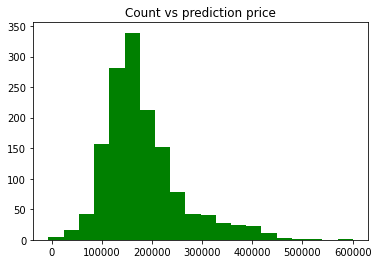

In [77]:
plt.hist(pred1,bins=20,color="g");
plt.title("Count vs prediction price")

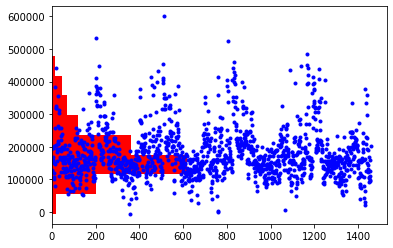

In [80]:
plt.hist(pred1,bins=10,orientation="horizontal",color="r")
plt.plot(pred1,"b.",)

In [81]:
# testing model using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
pred2=processing(model)

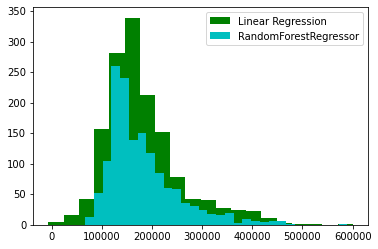

In [99]:
plt.hist(pred1,bins=20,color="g");
plt.hist(pred2,bins=30,color="c");
plt.legend(["Linear Regression","RandomForestRegressor"])
#plt.title("Count vs prediction price")

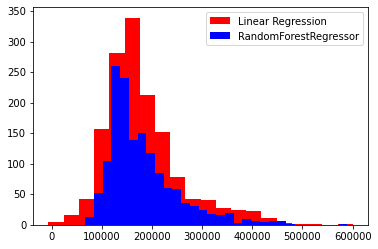

In [93]:
plt.hist(pred1,bins=20,color="r");
plt.hist(pred2,bins=30,color="b");
plt.legend(["Linear Regression","RandomForestRegressor"])
#plt.title("Count vs prediction price")


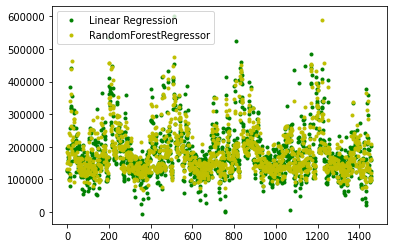

In [100]:
plt.plot(pred1,"g.",)
plt.plot(pred2,"y.",)
plt.legend(["Linear Regression","RandomForestRegressor"])